# Módulo 5 - Técnicas de Programação II

## Introdução

Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.


**Tipos de gráficos mais usuais:**
- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.
<img src="./images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado". No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

## Gráficos com pandas

A biblioteca pandas, que estudamos no módulo 4, permite realizar alguns gráficos simples, baseados na biblioteca matplotlib. Vamos aprender a aplicá-los utilizando a base de dados do titanic como exemplo.  

**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Gráfico de dispersão (scatter plot)

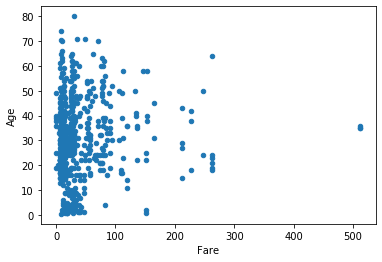

In [4]:
## Gráfico de dispersão de Idade x Tarifa no titanic
df.plot(x='Fare', y='Age', kind='scatter')

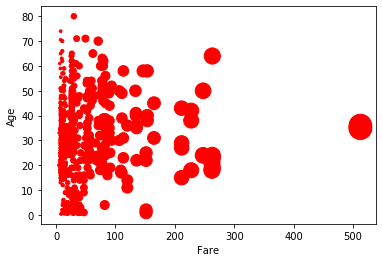

In [5]:
## Gráfico de dispersão de Idade x Tarifa no titanic, com tamanho variando pela Tarifa
df.plot(x='Fare', y='Age', kind='scatter', s = 'Fare', c = 'red')

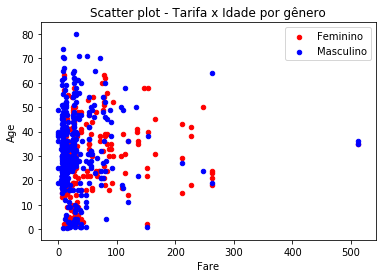

In [6]:
## se mexer apenas no xlabel e ylabel do primeiro grafico, ele mantém os labels do segundo (padrão)
ax1 = df[df.Sex == 'female'].plot(x='Fare', y='Age', kind='scatter', c = 'red', label = 'Feminino', 
                                  xlabel = 'Tarifa', ylabel='Idade',
                                  title='Scatter plot - Tarifa x Idade por gênero')
ax2 = df[df.Sex == 'male'].plot(x='Fare', y='Age', kind='scatter', c = 'blue', label = 'Masculino', ax=ax1)



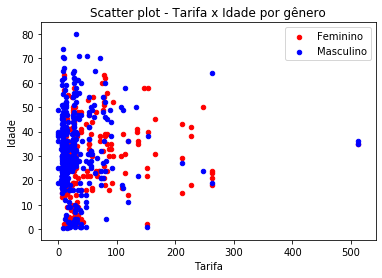

In [7]:
## se mexer apenas no xlabel e ylabel do segundo gráfico, ele altera para o label do segundo
ax1 = df[df.Sex == 'female'].plot(x='Fare', y='Age', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - Tarifa x Idade por gênero')
ax2 = df[df.Sex == 'male'].plot(x='Fare', y='Age', kind='scatter', c = 'blue', label = 'Masculino', 
                                xlabel = 'Tarifa', ylabel='Idade', ax=ax1)



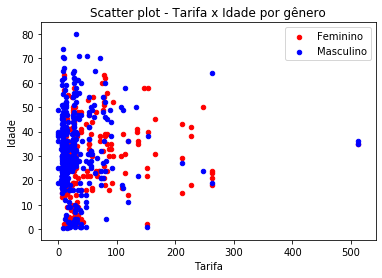

In [11]:
## Uma forma de evitar isso, é utilizar as funções set_xlabel e set_ylabel para determinar labels e títulos no final de tudo

ax1 = df[df.Sex == 'female'].plot(x='Fare', y='Age', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - Tarifa x Idade por gênero')
ax2 = df[df.Sex == 'male'].plot(x='Fare', y='Age', kind='scatter', c = 'blue', label = 'Masculino', 
                                ax=ax1)

ax1.set_xlabel('Tarifa')
ax1.set_ylabel('Idade')

## plt.show evita imprimir textos "desnecessários" das funções
plt.show()

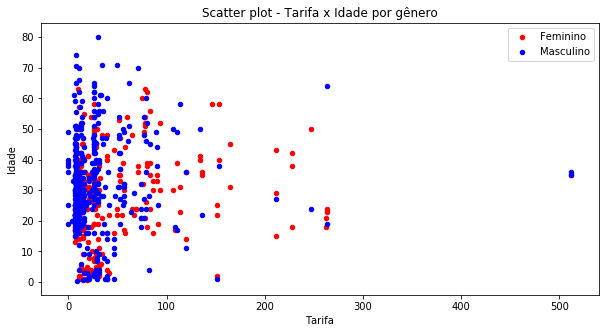

In [13]:
## Mexer no tamanho dos gráficos

ax1 = df[df.Sex == 'female'].plot(x='Fare', y='Age', kind='scatter', c = 'red', label = 'Feminino', 
                                  title='Scatter plot - Tarifa x Idade por gênero')
ax2 = df[df.Sex == 'male'].plot(x='Fare', y='Age', kind='scatter', c = 'blue', label = 'Masculino', 
                                ax=ax1, figsize=(10,5))

ax1.set_xlabel('Tarifa')
ax1.set_ylabel('Idade')

## plt.show evita imprimir textos "desnecessários" das funções
plt.show()

## Gráfico de linhas

In [23]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Vendas' : np.random.randint(low=100, size=12),
                          'Produto' : np.repeat(['Samsung', 'Apple', 'Motorola'],4)})

In [25]:
df_vendas.head()

,Mês,Vendas,Produto
0,Jan,95,Samsung
1,Fev,67,Samsung
2,Mar,12,Samsung
3,Abr,9,Samsung
4,Jan,90,Apple


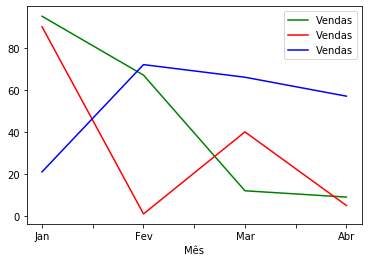

In [31]:
ax1 = df_vendas[df_vendas['Produto'] == 'Samsung'].plot(x='Mês', y='Vendas', c='green')
ax2 = df_vendas[df_vendas['Produto'] == 'Apple'].plot(x='Mês', y='Vendas', c='red', ax=ax1)
ax3 = df_vendas[df_vendas['Produto'] == 'Motorola'].plot(x='Mês', y='Vendas', c='blue', ax=ax1)

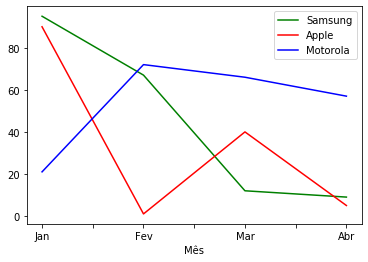

In [47]:
ax1 = df_vendas[df_vendas['Produto'] == 'Samsung'].plot(x='Mês', y='Vendas', c='green', label='Samsung')
ax2 = df_vendas[df_vendas['Produto'] == 'Apple'].plot(x='Mês', y='Vendas', c='red', label='Apple',ax=ax1)
ax3 = df_vendas[df_vendas['Produto'] == 'Motorola'].plot(x='Mês', y='Vendas', c='blue', label='Motorola',ax=ax1)

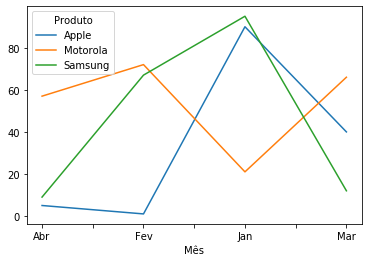

In [33]:
df_vendas.pivot(index='Mês', columns='Produto', values='Vendas').plot(kind='line')

In [40]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)

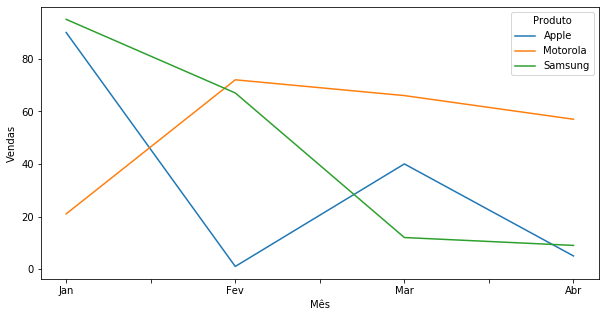

In [46]:
df_vendas.pivot(index='Mês', columns='Produto', values='Vendas').plot(kind='line', ylabel='Vendas', figsize=(10,5))

## Gráfico de pizza

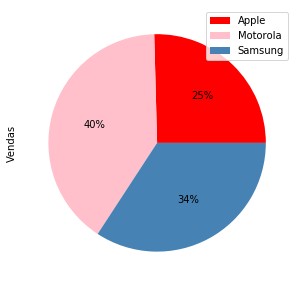

In [67]:
df_vendas.groupby(['Produto']).sum().plot(y='Vendas', kind='pie', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'], labeldistance=None, figsize=(10,5))

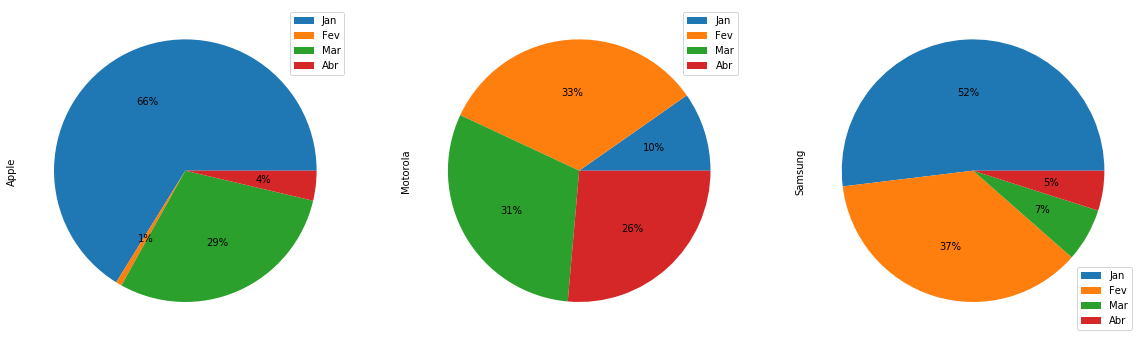

In [70]:
df_vendas.pivot(index='Mês', columns='Produto', values='Vendas').plot(subplots=True, kind='pie', figsize=(20,10), 
                                                                      autopct='%1.0f%%', labeldistance=None)
plt.show()

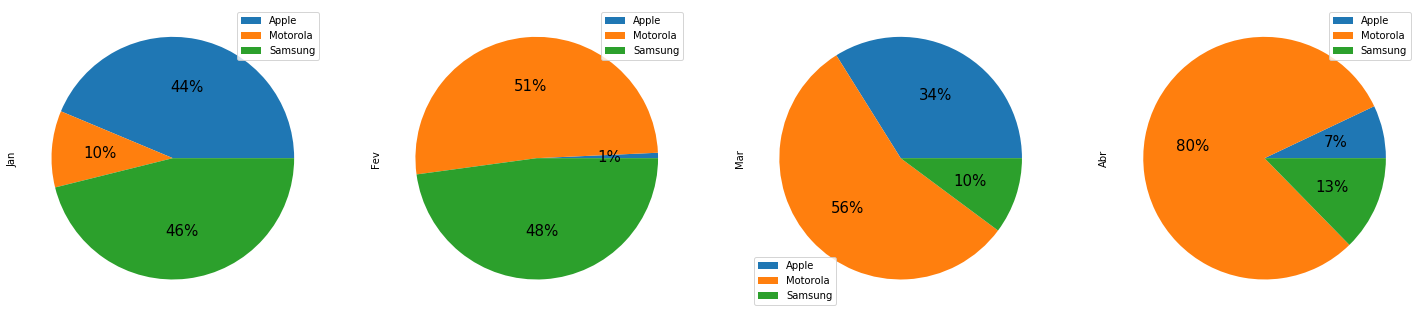

In [79]:
ax_pie = df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(subplots=True, kind='pie', figsize=(25,15), 
                                                                      autopct='%1.0f%%', labeldistance=None,
                                                                     fontsize=15)
plt.show()

## Gráfico de barras

In [2]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Vendas' : np.random.randint(low=100, size=12),
                          'Produto' : np.repeat(['Samsung', 'Apple', 'Motorola'],4)})

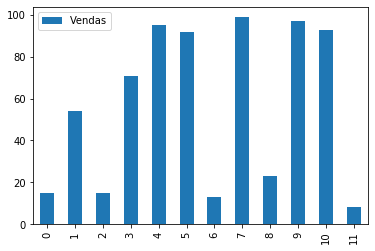

In [4]:
df_vendas.plot(kind='bar')

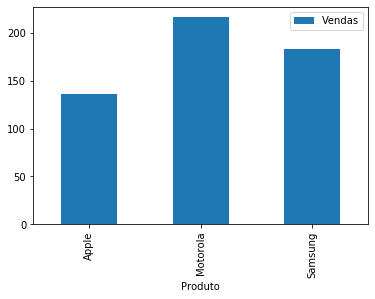

In [88]:
df_vendas.groupby('Produto').sum().plot(kind='bar')

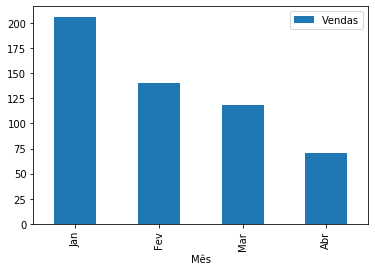

In [89]:
df_vendas.groupby('Mês').sum().plot(kind='bar')

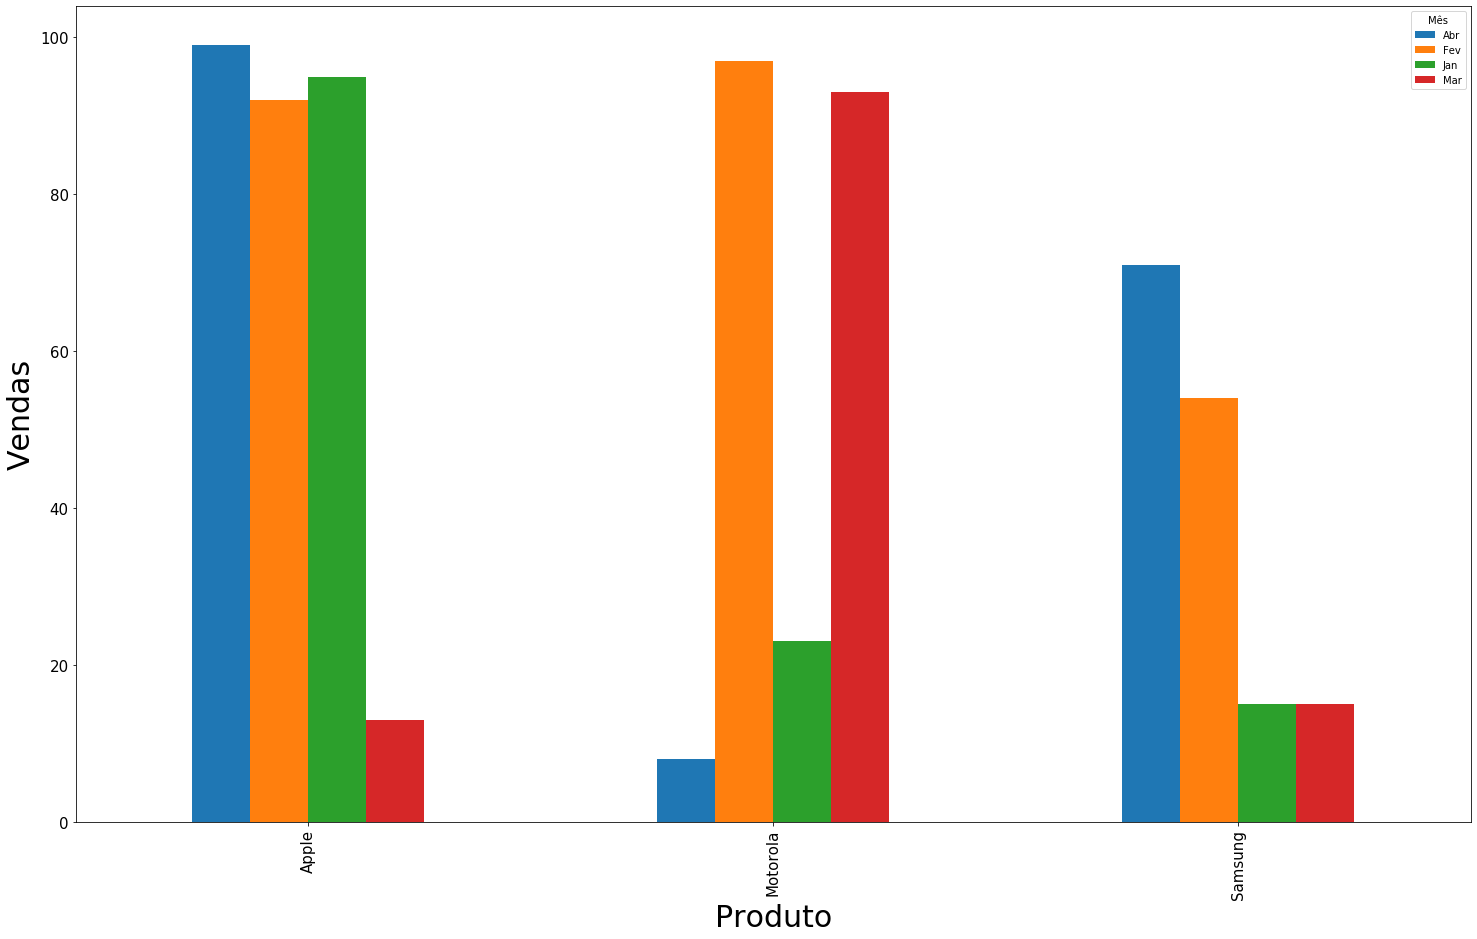

In [5]:
## o index sempre é o que vai no eixo X, e o values é o que vai no eixo Y. Columns irá separar em vários gráficos
## Se subplot=True, e se False, irá criar barras coloridas lado a lado mostrando esses 

ax_bar = df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='bar', figsize=(25,15), 
                                                                      fontsize=15)

ax_bar.set_ylabel('Vendas', fontsize=30)
ax_bar.set_xlabel('Produto', fontsize=30)

plt.show()

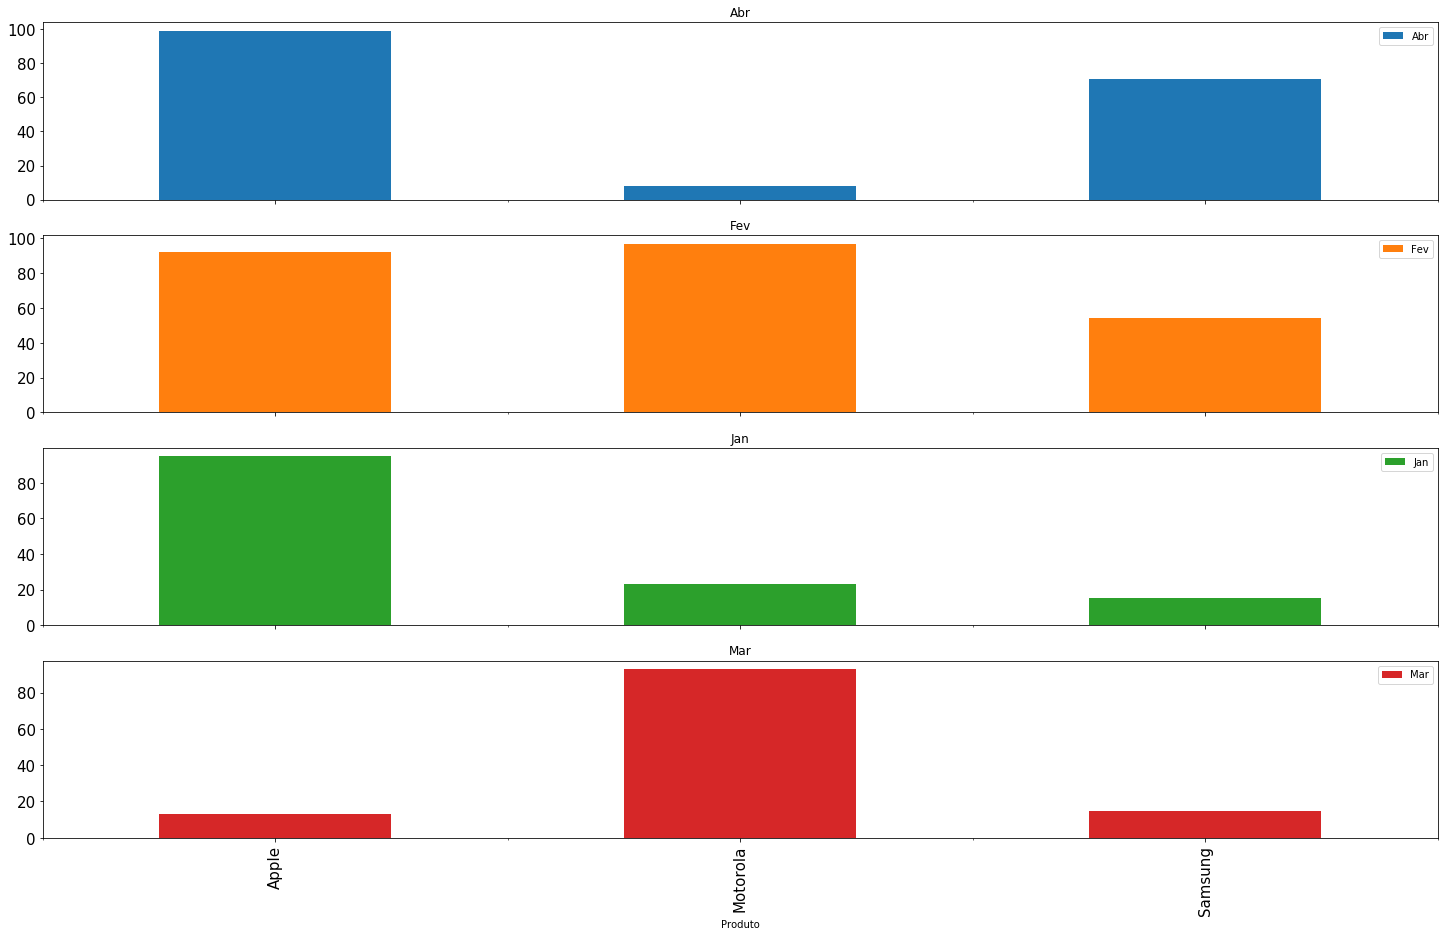

In [6]:
ax_bar = df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(subplots=True, kind='bar', figsize=(25,15), 
                                                                      fontsize=15)
plt.show()

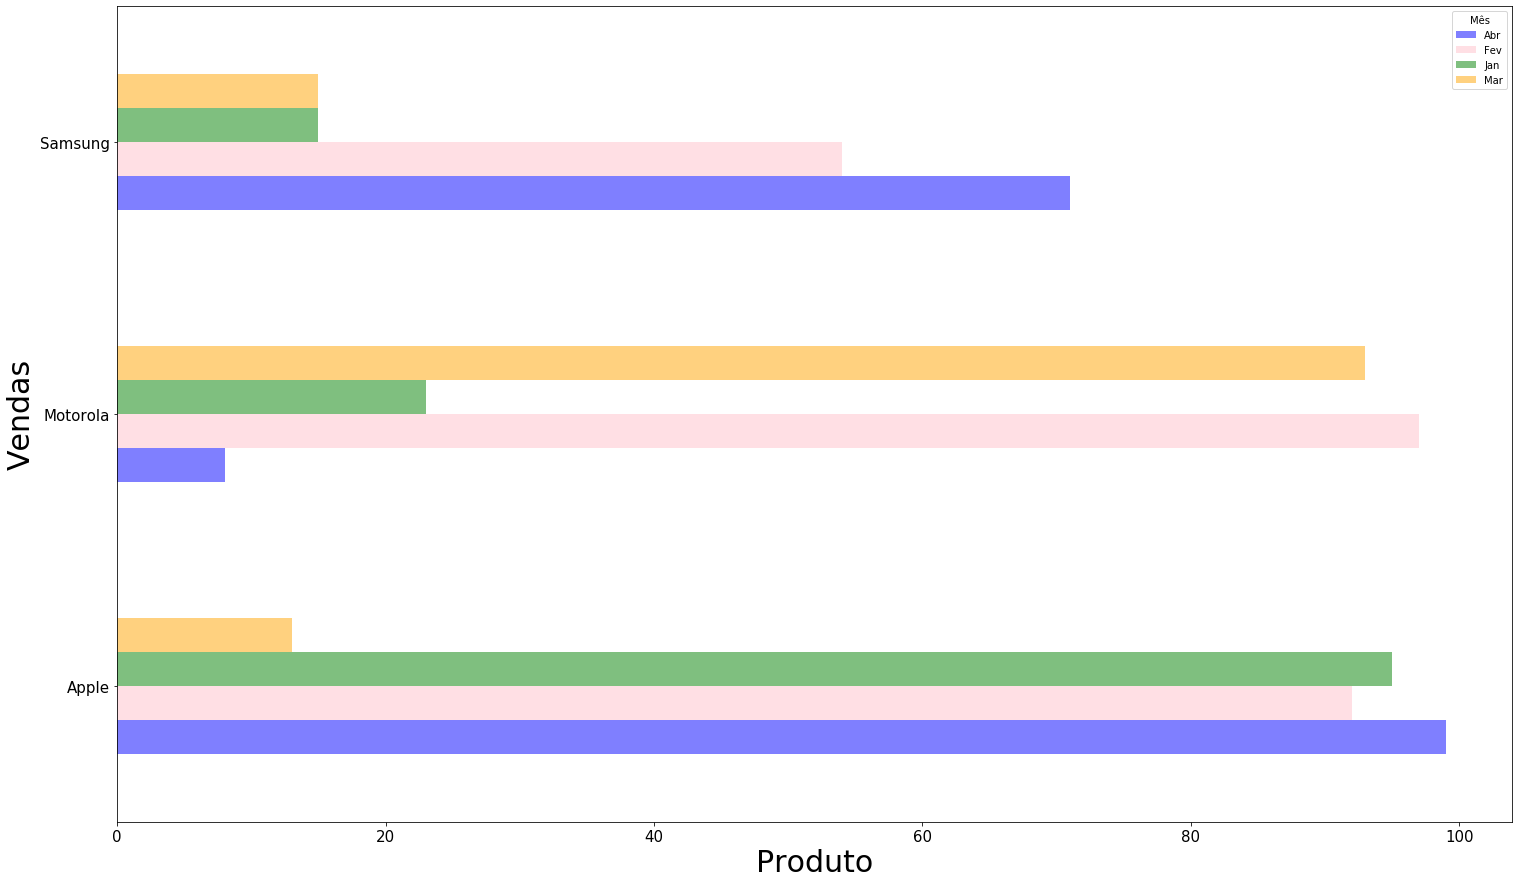

In [21]:
ax_bar = df_vendas.pivot(index='Produto', columns='Mês', values='Vendas').plot(kind='barh', figsize=(25,15), 
                                                                      fontsize=15, color={'Abr' : 'blue', 
                                                                                          'Jan' : 'green',
                                                                                         'Fev' : 'pink', 
                                                                                         'Mar' : 'orange'}, alpha=.5)

ax_bar.set_ylabel('Vendas', fontsize=30)
ax_bar.set_xlabel('Produto', fontsize=30)

plt.show()

## Histograma

[]

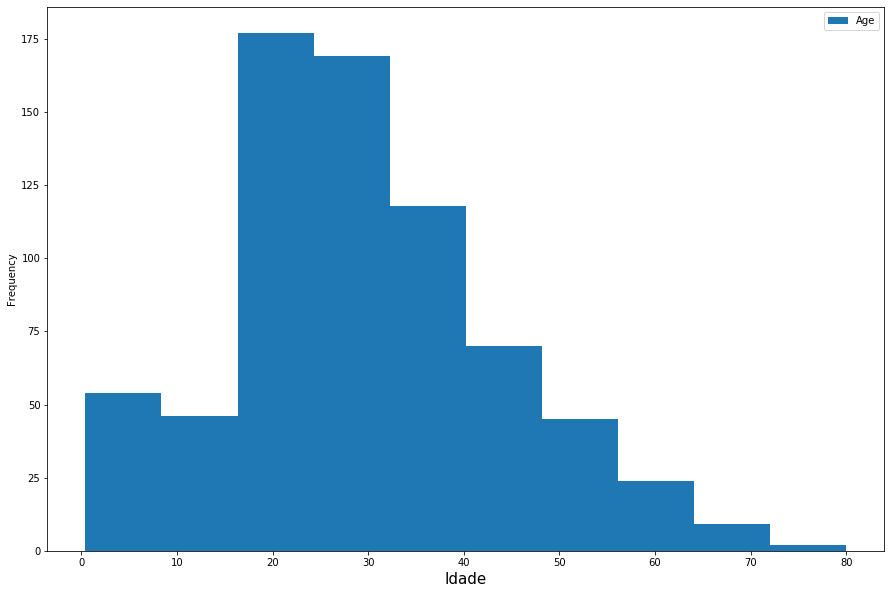

In [19]:
## Bins = número de 'colunas'
ax_hist = df.plot(y='Age', kind='hist', bins=10, figsize=(15,10))
ax_hist.set_xlabel('Idade', fontsize=15)

ax_hist.plot()

[]

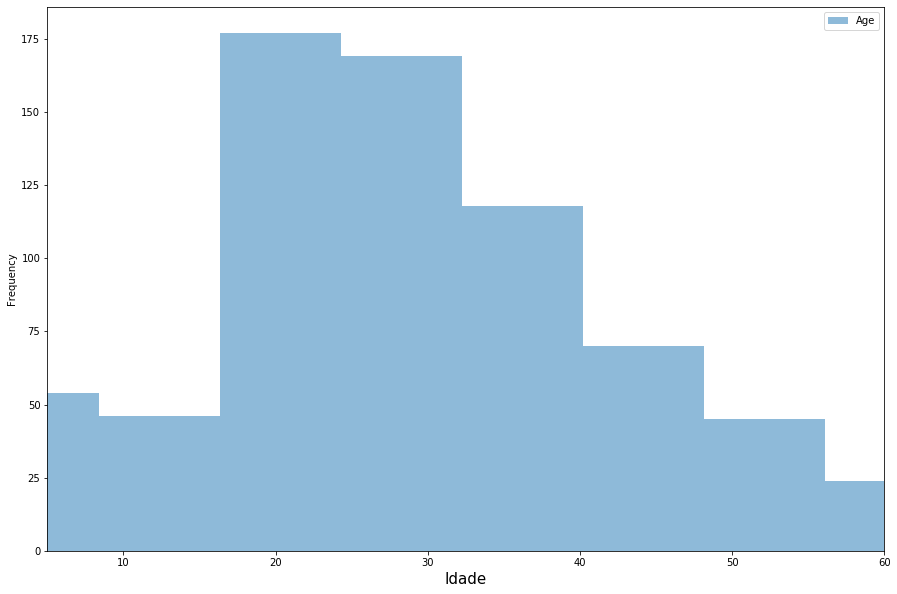

In [22]:
## alpha = transparencia 
## xlim e ylim = 'corte' da visualização dos dados
ax_hist = df.plot(y='Age', kind='hist', bins=10, figsize=(15,10), alpha=.5, xlim=[5,60])
ax_hist.set_xlabel('Idade', fontsize=15)

ax_hist.plot()

[]

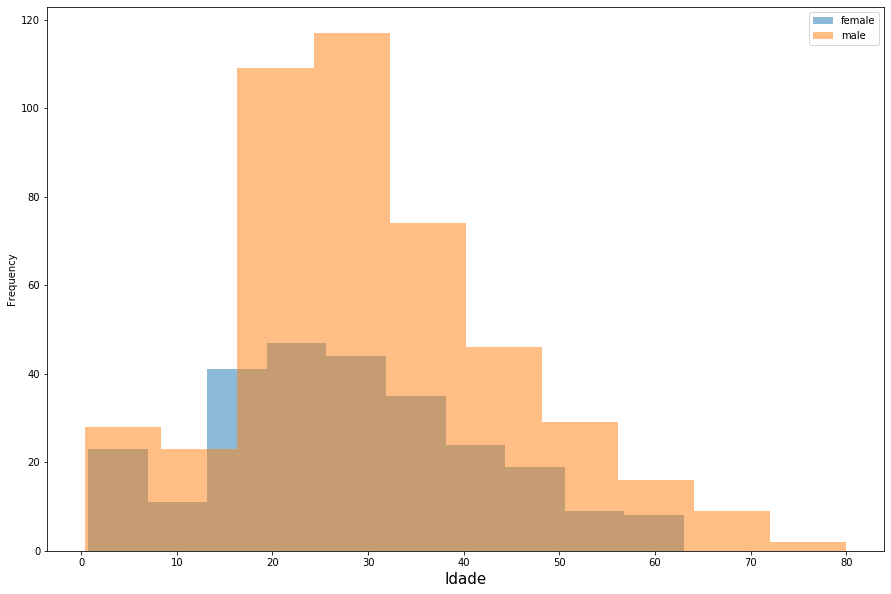

In [52]:
ax_hist = df[df['Sex']=='female'].plot(y='Age', kind='hist', bins=10, figsize=(15,10), alpha=.5, label='female')
ax_hist2 = df[df['Sex']=='male'].plot(y='Age', kind='hist', bins=10, figsize=(15,10), alpha=.5, ax=ax_hist, label='male')
ax_hist.set_xlabel('Idade', fontsize=15)

ax_hist.plot()

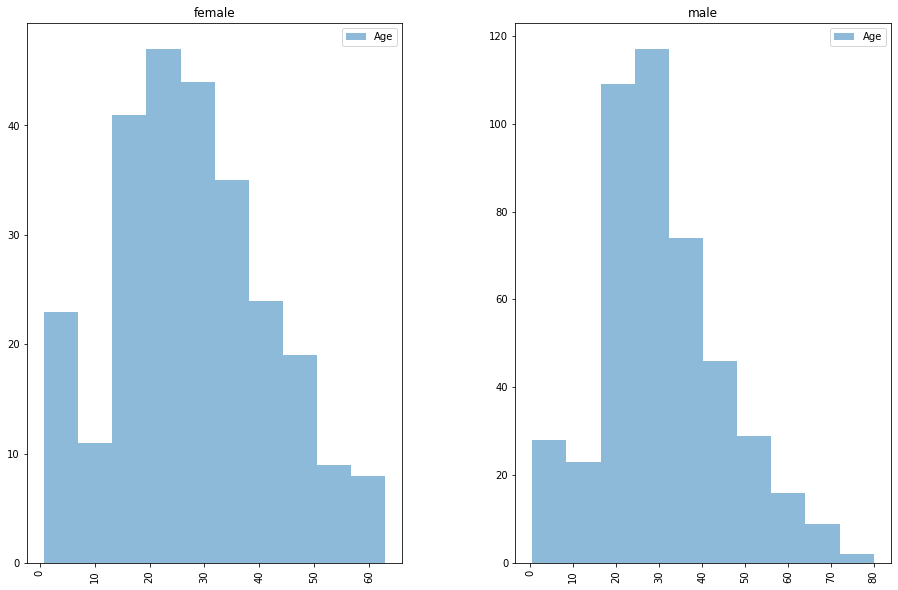

In [57]:
ax_hist = df.hist(column='Age', by='Sex', bins=10,
                  figsize=(15,10), alpha=.5, 
                  legend=True)


## Box-plot

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


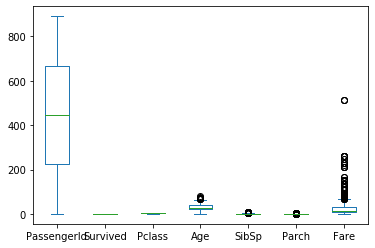

In [26]:
df.plot(kind='box')

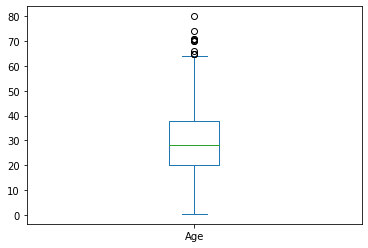

In [27]:
df.plot(y='Age', kind='box')

In [40]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

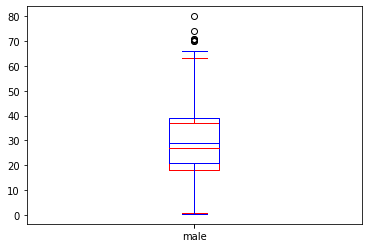

In [46]:
ax1 = df[df['Sex']=='female'].plot(y='Age',  kind='box', color='red', label='female')
ax2 = df[df['Sex']=='male'].plot(y='Age',  kind='box', color='blue', label='male', ax=ax1)

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


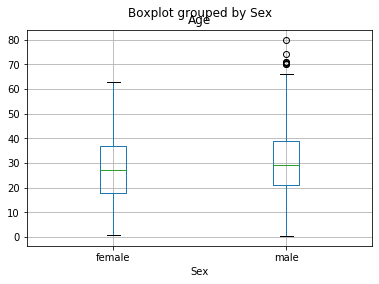

In [50]:
df.boxplot(column='Age', by='Sex')

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260D7ED2E88>,
      dtype=object)

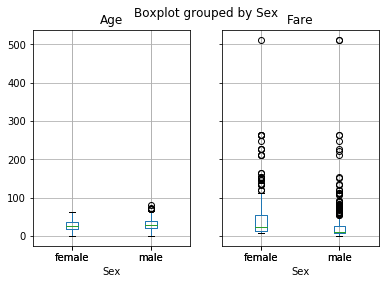

In [58]:
df.boxplot(column=['Age', 'Fare'], by='Sex')

C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\gabi_\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


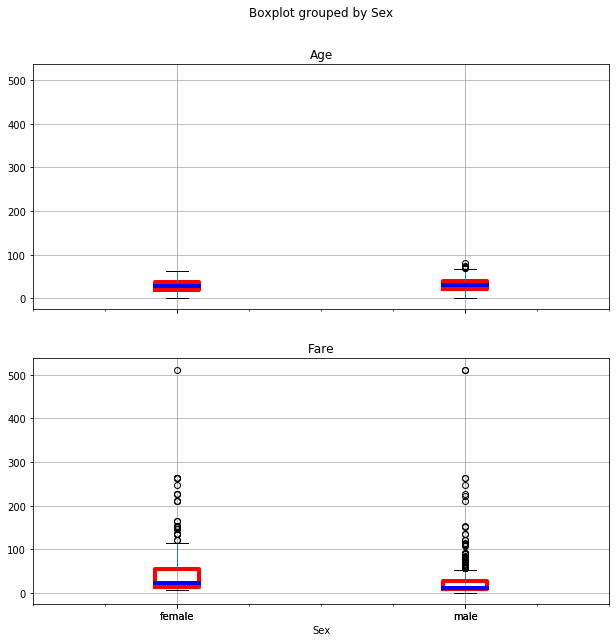

In [66]:
df.boxplot(column=['Age', 'Fare'], by='Sex', layout=(2, 1), figsize=(10,10), 
           boxprops = dict(linestyle='-', linewidth=4, color='red'),
          medianprops = dict(linestyle='-', linewidth=4, color='blue'))
plt.show()